**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

# *Using multiclass classifier for music genre identification* 

## Abstract

The goal of the project was to create a working classifier to identify different music genres. The given data consisted of training data and test data and the aim was to identify the genre of the songs in the test data. The data was analysed by using different visualizations of the data features and filtered based on the findings. For this problem, a multiclass gradient descent classifier was chosen. The classifier was able to identify the right genre of 10 possible genres on the test data with an accuracy of 61,7 % and with logistic loss of 0,1925.

## 1. Introduction

Categorizing songs according to their genre can be an interesting task. With huge availability for different music databases categorizing them can be hard. One way to categorize them is genre and this can be done with the help of machine learning. A music genre can be identified by analyzing the different features of the song, e.g., rhythm patterns and chroma describing different pitch classes in music. If we have a training data set that consists of set of features for each song and labels of genres that the songs belong to, we can create a classifier on based of this data. This is called supervised learning, whereas training done without labels counts as unsupervised learning.

For this project, following kind of machine learning problem was presented. We were given a data set which contained training data, test data and training labels. Training data consisted of 4363 songs, whereas  test data consisted of 6544 songs. Both of the data sets also include 264 features describing each song. Training labels represented 10 different genres that the each of the songs belonged to. For the test data the corresponding labels has not been given. The task was to predict the labels for the training data.

As stated in the beginning, nowadays this kind of tasks are important because databases can be really big and categorizing them can be hard, especially by hand. This kind of problem does not only apply to music, but all kinds of files and data.

Earlier in this course we had created different kind of predictors for different problems, but did not have the chance to solve a machine learning problem by ourselves without clear instructions. We were happy to learn how to apply a simple classifier for this kind of problem and to be able to analyze the data and see the difference between redundant and important data.

## 2. Data analysis

The data includes a training data with 4363 songs, test data with 6544 songs and training labels pointing which genre the training set songs belong to. There is 264 features (dimensionality) describing a song. The features are divided into three groups; rhythm, timbre (MFCC) and pitch (chroma). For the rhythm patterns there are 168 features and for the timbre and pitch there are 48 features for each. There are 10 different genres and therefore 10 different possibilities for the labels; pop/rock, electronic, rap, jazz, latin, RnB, international, country, reggae and blues.
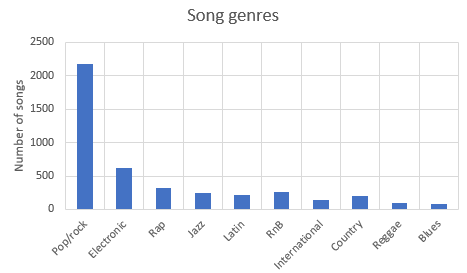
Almost half of the training data (2178 songs) consists of pop/rock-songs and only 86 songs are blues. Usually, the more there are training data, in this case songs, the better we are able to teach the classifiers to recognize the correct label in question. However, there seems to be a correspondence between the amount of songs for a particular genre and the variations in the features of the genre. The variance in pop/rock features is significantly higher than in any other genre. Also, blues seems to have one of the smallest variations in features. This can also be due to nature of the genre. Modern pop/rock is musically very varied and songs could intuitively thought to be easily mixed, e.g. with electronic or rap. A lot of modern pop actually includes rap in the parts of the songs. Small variations in the features generally makes data more distinct and easier for the predictor to identify.
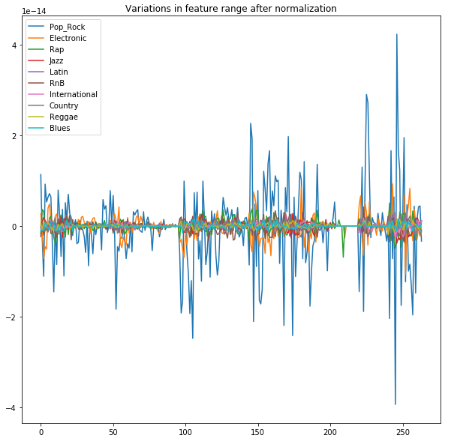
We found out that in beginning of MFCC features there is a similar "spike" on every genre. Close to the spike in the chroma side of the features we also noticed that rap showed some distinctive values in the features that other genres did not seem to posses. This implied that rap might be the most opportunistic genre to predict. Spike was removed to make visualizing the MFCC feature range more comprehensible. For visualizing the training data in 2D graph, means of the features over all songs were taken and plotted. Generally the scales of the data was varying very much. On some features the data range could be 0 to 1 and in some features it could range from 0 to 10000. This indicated that normalization could be helpful when minimizing the loss function.
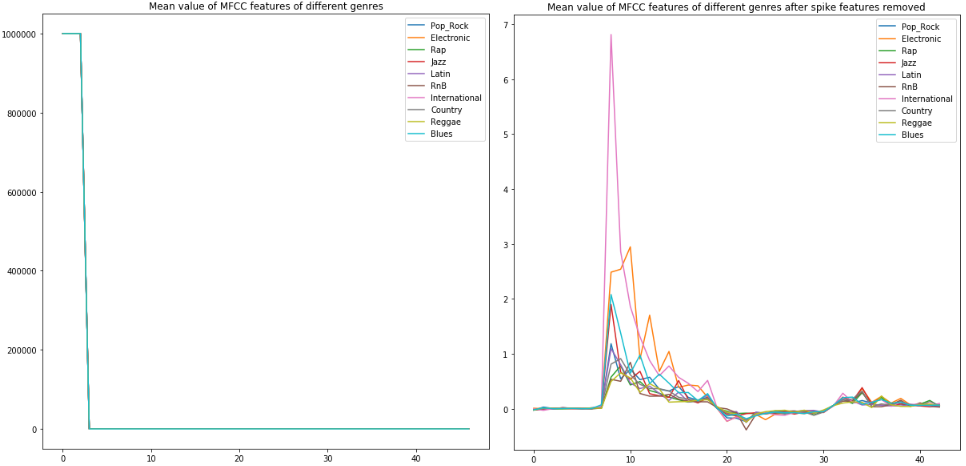

We also noticed that the data was clearly separated in smaller feature groups. For example, in the features 1 to 168 (rhythm patterns), the data was divided into 7 different parts and for the chroma and MFCC there seemed to be 4 for each.
The picture below is a visualization of the rhythm features (1 to 168) from 150 different songs. You can see that the data is divided into 7 clearly different parts.
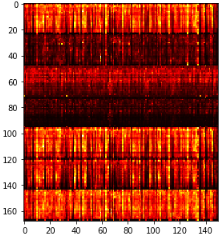

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import itertools

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import os
# Any results you write to the current directory are saved as output.

In [4]:
# Load the data and cleanup
df_test_data = pd.read_csv('test_data.csv', header=None) 
df_train_data = pd.read_csv('train_data.csv', header=None)
df_labels = pd.read_csv('train_labels.csv', header=None)
test_data = df_test_data.values
train_data = df_train_data.values
labels = df_labels.values
train_labels = labels

N_datapoints = np.size(train_data,0)
N_features = np.size(train_data, 1)

In [5]:
def plot_features(X, y, feature_begin, feature_end, title=""):
    
    mean_poprock_features = np.mean(X[y[y==1]], 0)
    mean_electronic_features = np.mean(X[y[y==2]], 0)
    mean_rap_features = np.mean(X[y[y==3]], 0)
    mean_jazz_features = np.mean(X[y[y==4]], 0)
    mean_latin_features = np.mean(X[y[y==5]], 0)
    mean_rnb_features = np.mean(X[y[y==6]], 0)
    mean_international_features = np.mean(X[y[y==7]], 0)
    mean_country_features = np.mean(X[y[y==8]], 0)
    mean_reggae_features = np.mean(X[y[y==9]], 0)
    mean_blues_features = np.mean(X[y[y==10]], 0)
    
    plt.figure(figsize=(10,10))
    plt.plot(mean_poprock_features[feature_begin:feature_end], label='Pop_Rock')
    plt.plot(mean_electronic_features[feature_begin:feature_end], label='Electronic')
    plt.plot(mean_rap_features[feature_begin:feature_end], label='Rap')
    plt.plot(mean_jazz_features[feature_begin:feature_end], label='Jazz')
    plt.plot(mean_latin_features[feature_begin:feature_end], label='Latin')
    plt.plot(mean_rnb_features[feature_begin:feature_end], label='RnB')
    plt.plot(mean_international_features[feature_begin:feature_end], label='International')
    plt.plot(mean_country_features[feature_begin:feature_end], label='Country')
    plt.plot(mean_reggae_features[feature_begin:feature_end], label='Reggae')
    plt.plot(mean_blues_features[feature_begin:feature_end], label='Blues')
    plt.title(title)
    plt.legend()
    plt.show()
    
    return

Number of Pop_Rock labels:  2178
Number of Electronic labels:  618
Number of Rap labels:  326
Number of Jazz labels:  253
Number of Latin labels:  214
Number of RnB labels:  260
Number of International labels:  141
Number of Country labels:  195
Number of Reggae labels:  92
Number of Blues labels:  86


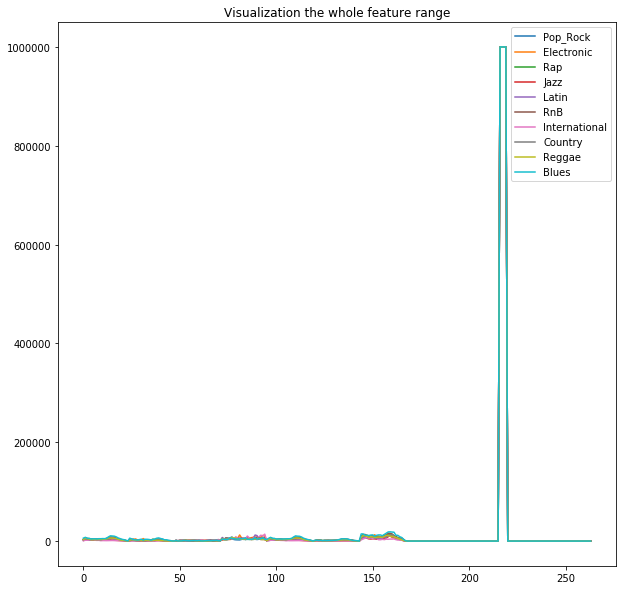

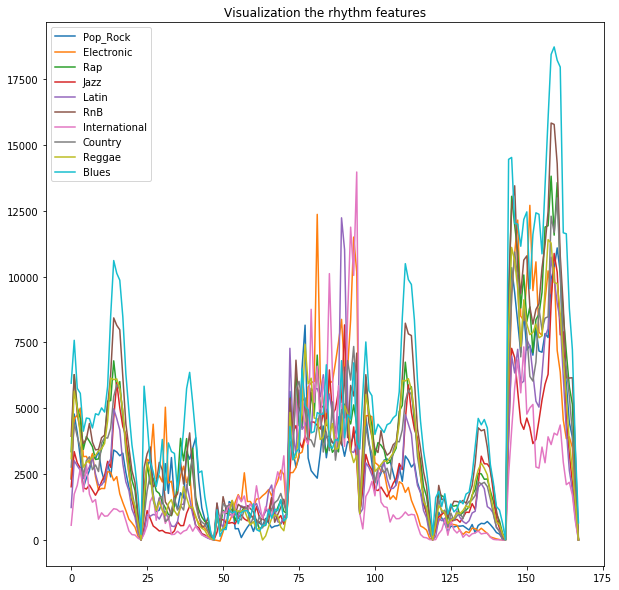

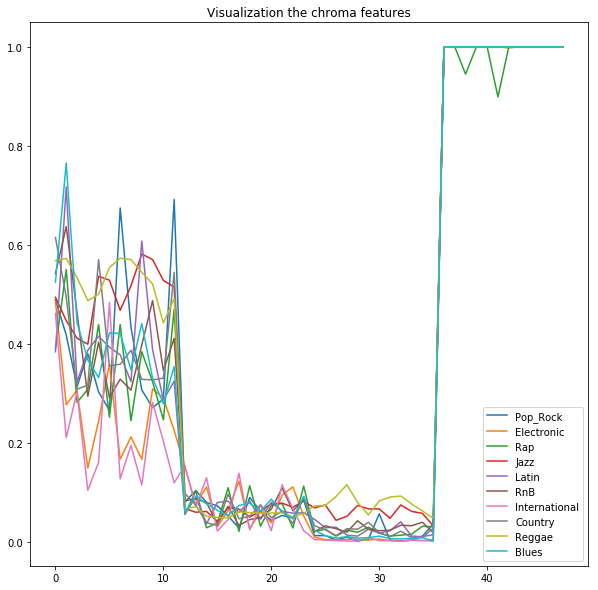

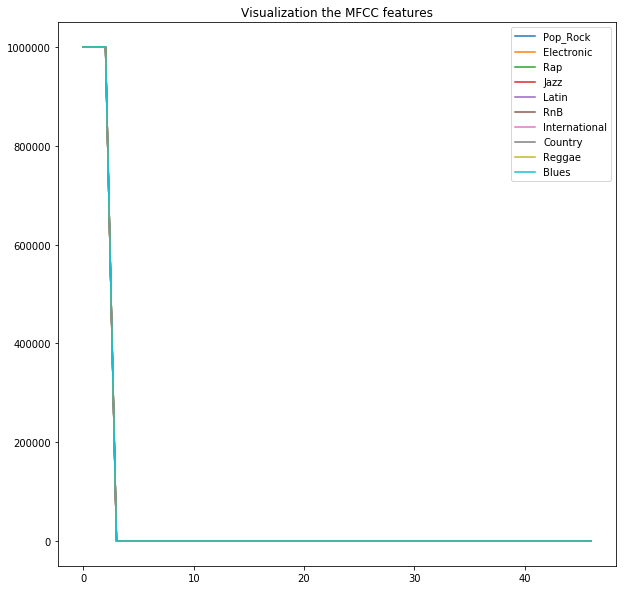

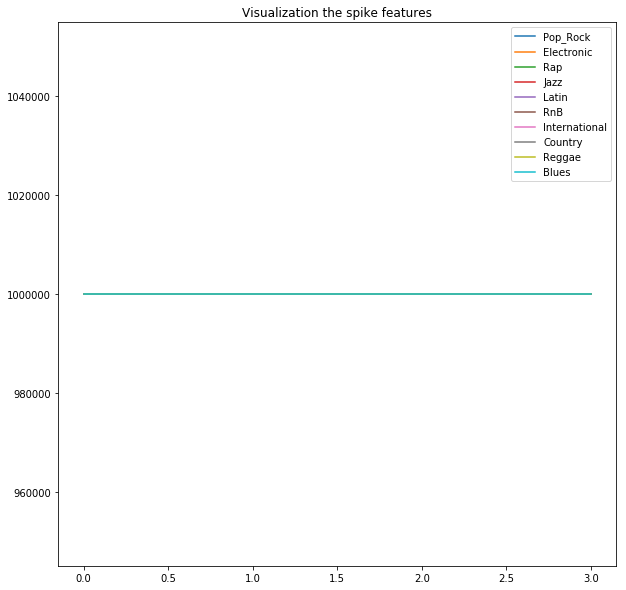

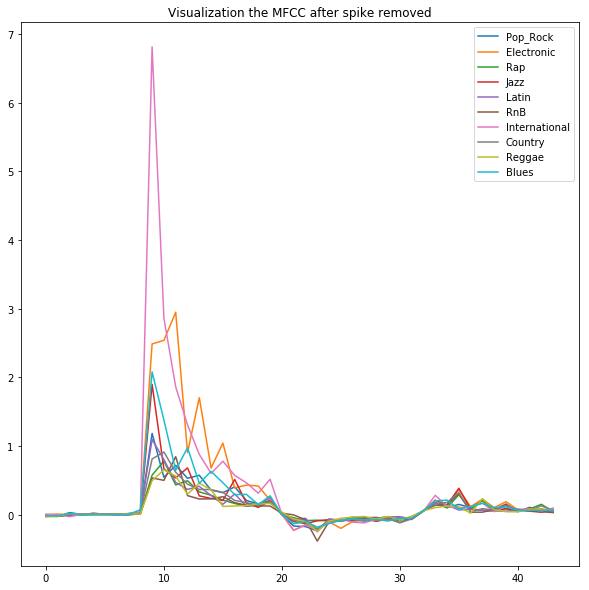

In [6]:
print("Number of Pop_Rock labels: ", np.size(train_data[train_labels[train_labels==1]], 0))
print("Number of Electronic labels: ", np.size(train_data[train_labels[train_labels==2]], 0))
print("Number of Rap labels: ", np.size(train_data[train_labels[train_labels==3]], 0))
print("Number of Jazz labels: ", np.size(train_data[train_labels[train_labels==4]], 0))
print("Number of Latin labels: ", np.size(train_data[train_labels[train_labels==5]], 0))
print("Number of RnB labels: ", np.size(train_data[train_labels[train_labels==6]], 0))
print("Number of International labels: ", np.size(train_data[train_labels[train_labels==7]], 0))
print("Number of Country labels: ", np.size(train_data[train_labels[train_labels==8]], 0))
print("Number of Reggae labels: ", np.size(train_data[train_labels[train_labels==9]], 0))
print("Number of Blues labels: ", np.size(train_data[train_labels[train_labels==10]], 0))

mean_poprock_features = np.mean(train_data[train_labels[train_labels==1]], 0)
mean_electronic_features = np.mean(train_data[train_labels[train_labels==2]], 0)
mean_rap_features = np.mean(train_data[train_labels[train_labels==3]], 0)
mean_jazz_features = np.mean(train_data[train_labels[train_labels==4]], 0)
mean_latin_features = np.mean(train_data[train_labels[train_labels==5]], 0)
mean_rnb_features = np.mean(train_data[train_labels[train_labels==6]], 0)
mean_international_features = np.mean(train_data[train_labels[train_labels==7]], 0)
mean_country_features = np.mean(train_data[train_labels[train_labels==8]], 0)
mean_reggae_features = np.mean(train_data[train_labels[train_labels==9]], 0)
mean_blues_features = np.mean(train_data[train_labels[train_labels==10]], 0)

feature_begin = 0
feature_end = 264
plot_features(train_data, train_labels, feature_begin, feature_end, "Visualization the whole feature range")

feature_begin = 0
feature_end = 168
plot_features(train_data, train_labels, feature_begin, feature_end, "Visualization the rhythm features")

feature_begin = 168
feature_end = 216
plot_features(train_data, train_labels, feature_begin, feature_end, "Visualization the chroma features")

feature_begin = 217
feature_end = 264
plot_features(train_data, train_labels, feature_begin, feature_end, "Visualization the MFCC features")

feature_begin = 216
feature_end = 220
plot_features(train_data, train_labels, feature_begin, feature_end, "Visualization the spike features")
              
feature_begin = 220
feature_end = 264
plot_features(train_data, train_labels, feature_begin, feature_end, "Visualization the MFCC after spike removed")

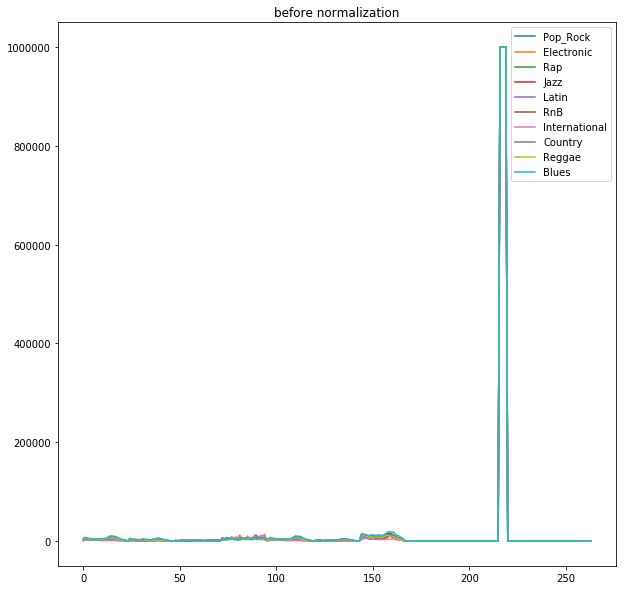

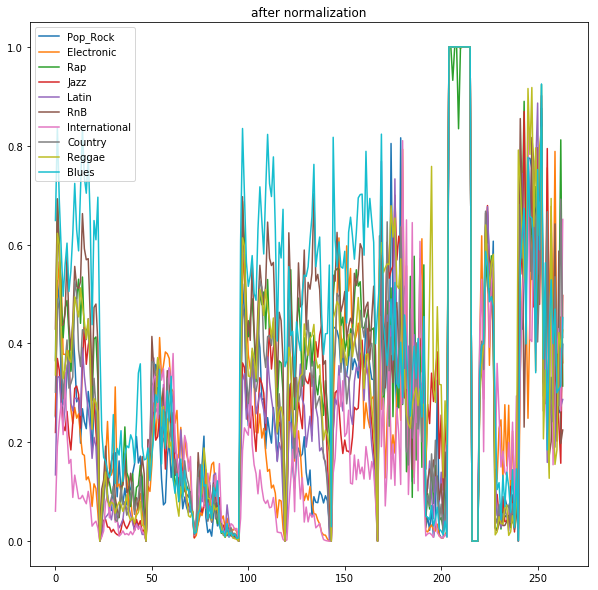

In [7]:
train_data_norm = np.zeros(train_data.shape)

for i in range(train_data.shape[1]):
    if (train_data[:,i].max() - train_data[:,i].min()) != 0:
        train_data_norm[:,i] = (train_data[:,i] - train_data[:,i].min()) / (train_data[:,i].max() - train_data[:,i].min())
        
feature_begin = 0
feature_end = 264
plot_features(train_data, train_labels, feature_begin, feature_end, "before normalization")
plot_features(train_data_norm, train_labels, feature_begin, feature_end, "after normalization")

test_data_norm = np.zeros(test_data.shape)

for i in range(test_data.shape[1]):
    if (test_data[:,i].max() - test_data[:,i].min()) != 0:
        test_data_norm[:,i] = (test_data[:,i] - test_data[:,i].min()) / (test_data[:,i].max() - test_data[:,i].min())

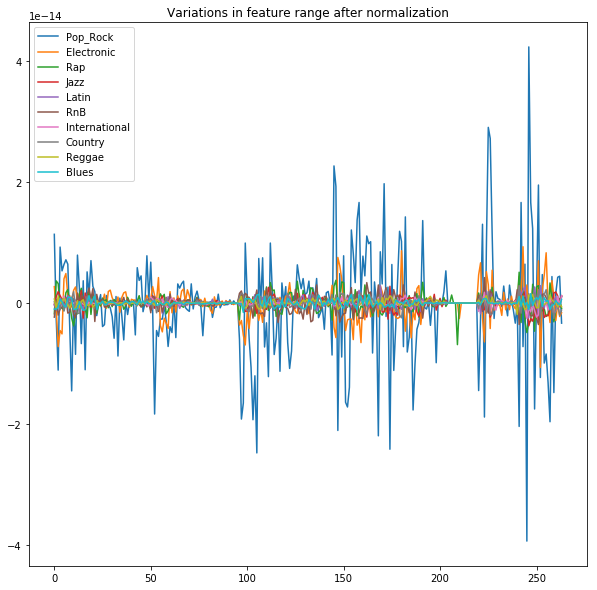

In [8]:
X = train_data_norm
y = train_labels

mean_poprock_features = np.mean(X[y[y==1]], 0)
mean_electronic_features = np.mean(X[y[y==2]], 0)
mean_rap_features = np.mean(X[y[y==3]], 0)
mean_jazz_features = np.mean(X[y[y==4]], 0)
mean_latin_features = np.mean(X[y[y==5]], 0)
mean_rnb_features = np.mean(X[y[y==6]], 0)
mean_international_features = np.mean(X[y[y==7]], 0)
mean_country_features = np.mean(X[y[y==8]], 0)
mean_reggae_features = np.mean(X[y[y==9]], 0)
mean_blues_features = np.mean(X[y[y==10]], 0)

plt.figure(figsize=(10,10))
plt.plot(np.mean((X[y[y==1]]-mean_poprock_features), 0), label='Pop_Rock')
plt.plot(np.mean((X[y[y==2]]-mean_electronic_features), 0), label='Electronic')
plt.plot(np.mean((X[y[y==3]]-mean_rap_features), 0), label='Rap')
plt.plot(np.mean((X[y[y==4]]-mean_jazz_features), 0), label='Jazz')
plt.plot(np.mean((X[y[y==5]]-mean_latin_features), 0), label='Latin')
plt.plot(np.mean((X[y[y==6]]-mean_rnb_features), 0), label='RnB')
plt.plot(np.mean((X[y[y==7]]-mean_international_features), 0), label='International')
plt.plot(np.mean((X[y[y==8]]-mean_country_features), 0), label='Country')
plt.plot(np.mean((X[y[y==9]]-mean_reggae_features), 0), label='Reggae')
plt.plot(np.mean((X[y[y==10]]-mean_blues_features), 0), label='Blues')
plt.legend()
plt.title("Variations in feature range after normalization")
plt.show()

## 3. Methods and experiments

We started the project by familiarizing ourselves with the data. After the time spend on analyzing the data (and reading the project description), it was concluded that gradient descent multiclass classifier (one-vs-all) would be a sensible choice for this problem. This was based on the fact that we had good training data and training labels.
We use the formula for logistic loss for gradient descent:
\begin{align}
\mathcal{E}(\mathbf{w})  = \frac{1}{N} \sum_{i=1}^{N}\mathbf{X^{T}}\big(\sigma(\mathbf{X}\mathbf{w})\big)-(\mathbf{X^{T}}\mathbf{y})
   \label{erm}
    \tag{1}
\end{align}
Where:
\begin{equation*}
      \sigma(z)= \frac{1}{1+{\rm exp}(-z)}.
    \label{sigmoid}
    \tag{2}
\end{equation*}
And finally the gradient descent:
\begin{equation*}
    \mathbf{w}^{(k+1)} = \mathbf{w}^{(k)} − \alpha\nabla \mathcal{E}(\mathbf{w}^{(k)})
    \label{gd}
    \tag{3}
\end{equation*}

However, this approach did not work perfectly right away. We noticed that the classifier is highly sensitive to the step size. From what was seen from the visualizations, the conclusion was that different features do not scale well and this is what makes finding common step size hard. We tried different step sizes based on the scaling on the visualizations and tested which ones resulted in best behaviour on minimizing the cost function. Scaling was particulary different between rhythm patterns, chroma and MFCC. That is why it was decided to use only rhythm patterns for training, this resulted around 54 % accuracy at first and in finding step size that seemed to work.

After this, we decided to try if with normalization we could use the whole set of features, including the chroma and MFCC with common step size. We applied min-max normalization (Eq 4) on the training data to get everything in the range of 0 to 1. Due to new scaling, the previous small step size did not work anymore and had to be adjusted to 0,1. This resulted in accuracy of 58 % and more importantly all of the features were now taken in the account in the learning process. 

\begin{equation}
    x' = \frac{x - min(x)}{max(x) - min(x)}
    \label{minmax}
    \tag{4}
\end{equation}

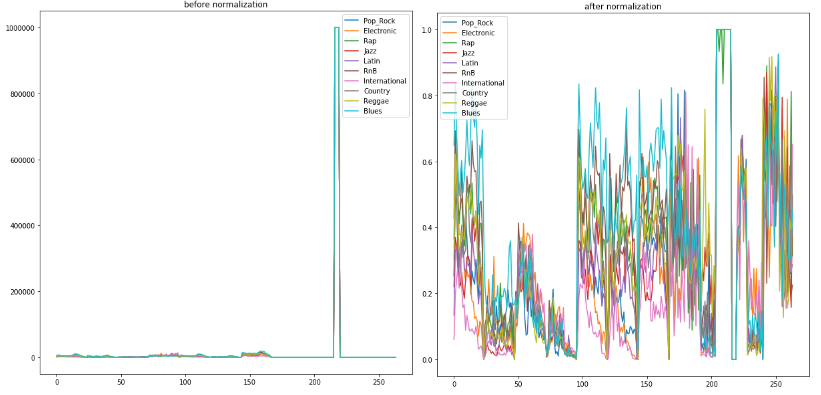

Like mentioned in the data analysis part, there was clearly a spike in data in the beginning of MFCC features. We tried filtering the spike out and seeing if this resulted in a better accuracy, but there seemed not to be change in any direction so we decided to just keep using it, judging it was only four features long but neverthless redundant.

The optimal weight matrix was calculated with the training data and then the accuracy was calculated by comparing the resulting predictions to the true labels of the songs. First the predictions were created for the training data and compared to the training labels. After that the predictions were done to the test data and submitted to Kaggle competition. The accuracy seemed to be fairly similar between the training data and test data, training data just winning by a few percent. After the accuracy was calculated, we added the function for loss list to the classifier. The logistic loss list seemed go hand in hand with the accuracy and decreased accordingly when accuracy increased.

We did some experiments with PCA (Principal Component Analysis) also. Applying PCA for the whole range with over 100 principal components did not result in good accuracy. Too much data was probably lost and the difference of the features made it inaccurate.
We decided to apply PCA to the data feature type -wise. We applied PCA separately to rhythm, chroma and MFCC features. The predictor was slightly more accurate this way but still not desirable. Like mentioned earlier, the data was separetad in "groups" inside the data types. For example, rhythm was divided into 7 groups. We divided the data into 9 different groups. 7 groups for rhythm features, 1 group for chroma features and 1 group for MFCC features.  With training data this resulted in slightly worse accuracy than without PCA, but a bit better logistic loss. However, the results with test data were worse than without PCA. We also tried dividing chroma features into 3 groups and MFCC features into 5 groups but this did not improve the results. This is probably due the fact that this way we did not lose the redundant data in chroma and MFCC since the spikes were divided into their own groups. We concluded that not using PCA would result in best accuracy and logistic loss.
Below is a figure that show's how the data was affected by the PCA.
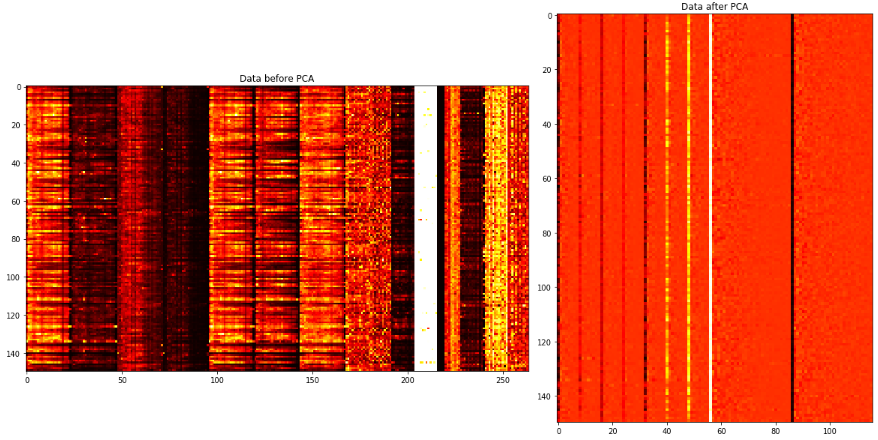

In [9]:
# Trials with ML algorithms
def sigmoid_func(z):
    
    sigmoid = 1 / (1 + np.exp(-z))
    
    return sigmoid

def gradient(X,y,w):
    
    N_dp = np.size(X,0)
    
    grad = np.zeros(N_features)
    
    grad = np.matmul(np.transpose(X), sigmoid_func(np.matmul(X, w))) - np.matmul(np.transpose(X), y)
    
    grad /= N_dp
    
    return grad

def logisticRegression_func(X, y, step_size, num_iter):
    
    N_dp = np.size(X,0)
    N_f = np.size(X,1)
   
    w = np.zeros(N_f).reshape(N_f,1)
    loss_list = np.zeros(num_iter)
    
    for i in range(num_iter):
        
        grad = gradient(X, y, w)
        w = w - step_size * grad
         
        empirical_risk = 0.0
        
        empirical_risk = -1 * np.matmul(np.transpose(y), np.log(sigmoid_func(np.matmul(X, w)))) - np.matmul(np.transpose(1 - y), np.log(1 - sigmoid_func(np.matmul(X, w))))

        loss_list[i] = empirical_risk / N_dp
    
    return loss_list, w

def predict_output(X, w):
    
    N_dp = np.size(X,0)
    y = np.zeros(N_dp)
    
    y = sigmoid_func(np.matmul(X, w))
    y[y >= 0.5] = 1
    y[y < 0.5] = 0
                         
    return y

def predict_multiclass(X, w_opt, N_labels):
    
    N_dp = np.size(X,0)
    N_f = np.size(X,1)
    
    y_predict = np.zeros(N_dp)
    y_hat = np.zeros(N_dp)
    y_likelihoods = np.zeros((N_dp, N_labels))
    
    for i in range(1, N_labels + 1):
        
        y_predictt = sigmoid_func(np.matmul(X, w_opt[i-1]))
        np.place(y_hat, y_predictt > y_predict, i)
        np.copyto(y_predict, y_predictt, 'no', y_predictt>y_predict)
        y_likelihoods[:,i-1] = sigmoid_func(np.matmul(X, w_opt[i-1]))
        
    y_hat = np.asmatrix(y_hat).T
    
    return y_hat, y_likelihoods

def calculate_accuracy(y, y_hat):
   
    correct = y.copy()
    correct[correct != y_hat] = 0
    correct[correct == y_hat] = 1
    accuracy = 1 / len(y) * np.sum(correct)
    
    return accuracy * 100

In [10]:
def compute_pca(Z, d):

    Q = (1/Z.shape[0])*(np.matmul(Z.T, Z))

    eigvalues, eigvectors = np.linalg.eig(Q)
    eigvalues=eigvalues.real
    eigvectors=eigvectors.real
    eigvectors=eigvectors.T

    W_pca2=np.zeros((eigvectors.shape[0],eigvectors.shape[1]))
    for i in range(eigvectors.shape[0]):
        W_pca2[(eigvectors.shape[0]-1)-i]=eigvectors.real[np.argsort(eigvalues.real)[i]]
    W_pca=np.zeros((d,eigvectors.shape[1]))
    for i in range(d):
        W_pca[i]=W_pca2[i]

    return W_pca.real,eigvalues

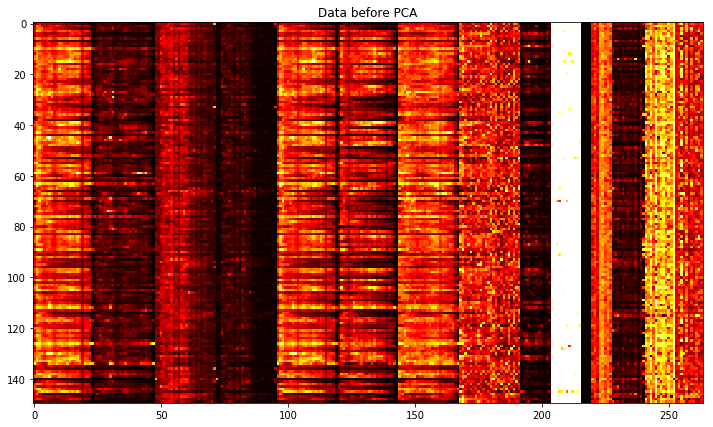

(4363, 116)
(6544, 116)


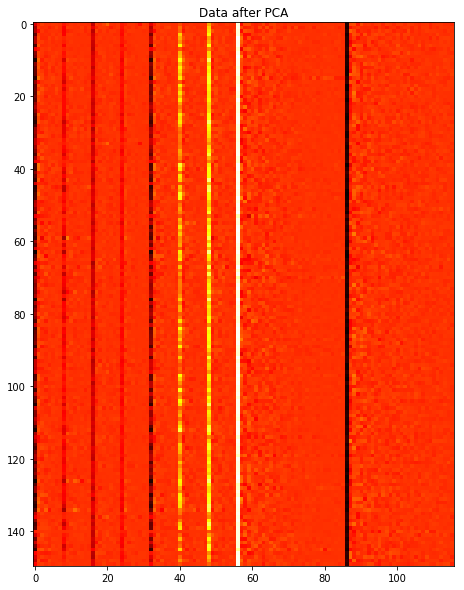

In [11]:
X= train_data_norm[:, 0:264]
Xtest= test_data_norm[:, 0:264]

plt.figure(figsize=(12, 10))
plt.imshow(X[:150,:], cmap='hot', interpolation='nearest')
plt.title('Data before PCA')
plt.show()

PCA, eigvalues=compute_pca(X[:,1:23],8)
X1 = np.matmul(PCA[:8],X[:,1:23,None])
PCA, eigvalues=compute_pca(X[:,24:48],8)
X2 = np.matmul(PCA[:8],X[:,24:48,None])
PCA, eigvalues=compute_pca(X[:,49:72],8)
X3 = np.matmul(PCA[:8],X[:,49:72,None])
PCA, eigvalues=compute_pca(X[:,73:97],8)
X4 = np.matmul(PCA[:8],X[:,73:97,None])
PCA, eigvalues=compute_pca(X[:,98:119],8)
X5 = np.matmul(PCA[:8],X[:,98:119,None])
PCA, eigvalues=compute_pca(X[:,120:143],8)
X6 = np.matmul(PCA[:8],X[:,120:143,None])
PCA, eigvalues=compute_pca(X[:,144:167],8)
X7 = np.matmul(PCA[:8],X[:,144:167,None])
PCA, eigvalues=compute_pca(X[:,168:216],30)
X8 = np.matmul(PCA[:30],X[:,168:216,None])
PCA, eigvalues=compute_pca(X[:,217:],30)
X9 = np.matmul(PCA[:30],X[:,217:,None])
#PCA, eigvalues=compute_pca(X[:,168:191],5)
#X8 = np.matmul(PCA[:5],X[:,168:191,None])
#PCA, eigvalues=compute_pca(X[:,192:203],5)
#X9 = np.matmul(PCA[:5],X[:,192:203,None])
#PCA, eigvalues=compute_pca(X[:,204:216],5)
#X10 = np.matmul(PCA[:5],X[:,204:216,None])
#PCA, eigvalues=compute_pca(X[:,217:220],2)
#X11 = np.matmul(PCA[:2],X[:,217:220,None])
#PCA, eigvalues=compute_pca(X[:,221:228],5)
#X12 = np.matmul(PCA[:5],X[:,221:228,None])
#PCA, eigvalues=compute_pca(X[:,229:241],6)
#X13 = np.matmul(PCA[:6],X[:,229:241,None])
#PCA, eigvalues=compute_pca(X[:,242:253],5)
#X14 = np.matmul(PCA[:5],X[:,242:253,None])
#PCA, eigvalues=compute_pca(X[:,254:264],5)
#X15 = np.matmul(PCA[:5],X[:,254:264,None])
X = np.hstack((X1,X2,X3,X4,X5,X6,X7,X8,X9))#,X10,X11,X12,X13,X14,X15))
X = X[:,:,0]
print(X.shape)

PCA, eigvalues=compute_pca(Xtest[:,1:23],8)
X1 = np.matmul(PCA[:8],Xtest[:,1:23,None])
PCA, eigvalues=compute_pca(Xtest[:,24:48],8)
X2 = np.matmul(PCA[:8],Xtest[:,24:48,None])
PCA, eigvalues=compute_pca(Xtest[:,49:72],8)
X3 = np.matmul(PCA[:8],Xtest[:,49:72,None])
PCA, eigvalues=compute_pca(Xtest[:,73:97],8)
X4 = np.matmul(PCA[:8],Xtest[:,73:97,None])
PCA, eigvalues=compute_pca(Xtest[:,98:119],8)
X5 = np.matmul(PCA[:8],Xtest[:,98:119,None])
PCA, eigvalues=compute_pca(Xtest[:,120:143],8)
X6 = np.matmul(PCA[:8],Xtest[:,120:143,None])
PCA, eigvalues=compute_pca(Xtest[:,144:167],8)
X7 = np.matmul(PCA[:8],Xtest[:,144:167,None])
PCA, eigvalues=compute_pca(Xtest[:,168:216],30)
X8 = np.matmul(PCA[:30],Xtest[:,168:216,None])
PCA, eigvalues=compute_pca(Xtest[:,217:],30)
X9 = np.matmul(PCA[:30],Xtest[:,217:,None])
#PCA, eigvalues=compute_pca(Xtest[:,168:191],5)
#X8 = np.matmul(PCA[:5],Xtest[:,168:191,None])
#PCA, eigvalues=compute_pca(Xtest[:,192:203],5)
#X9 = np.matmul(PCA[:5],Xtest[:,192:203,None])
#PCA, eigvalues=compute_pca(Xtest[:,204:216],5)
#X10 = np.matmul(PCA[:5],Xtest[:,204:216,None])
#PCA, eigvalues=compute_pca(Xtest[:,217:220],2)
#X11 = np.matmul(PCA[:2],Xtest[:,217:220,None])
#PCA, eigvalues=compute_pca(Xtest[:,221:228],5)
#X12 = np.matmul(PCA[:5],Xtest[:,221:228,None])
#PCA, eigvalues=compute_pca(Xtest[:,229:241],6)
#X13 = np.matmul(PCA[:6],Xtest[:,229:241,None])
#PCA, eigvalues=compute_pca(Xtest[:,242:253],5)
#X14 = np.matmul(PCA[:5],Xtest[:,242:253,None])
#PCA, eigvalues=compute_pca(Xtest[:,254:264],5)
#X15 = np.matmul(PCA[:5],Xtest[:,254:264,None])
Xtest = np.hstack((X1,X2,X3,X4,X5,X6,X7,X8,X9))#,X10,X11,X12,X13,X14,X15))
Xtest = Xtest[:,:,0]
print(Xtest.shape)

plt.figure(figsize=(8, 10))
plt.imshow(X[:150,:], cmap='hot', interpolation='nearest')
plt.title('Data after PCA')
plt.show()

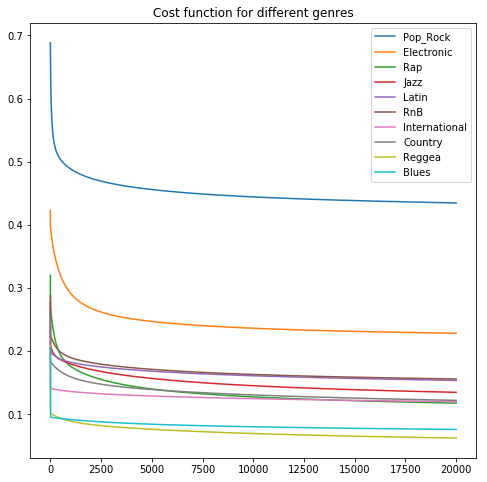

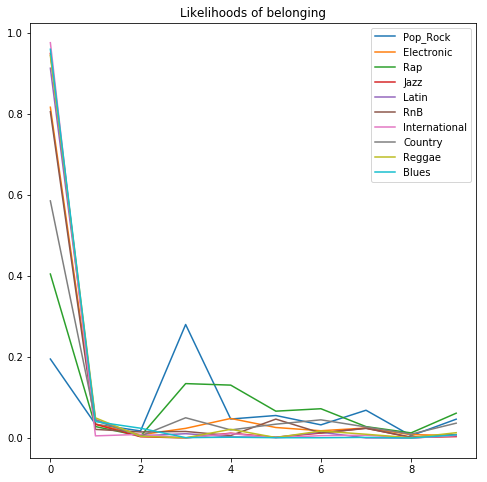

Accuracy:  68.2787073115
LogLoss:  0.548573834317


In [15]:
#X = train_data[:, 0:168]
X = train_data_norm[:, 0:264] #When not using PCA
Xtest = test_data_norm[:, 0:264] #When not using PCA

N_dp = np.size(X,0)
N_f = np.size(X,1)
N_labels = 10

step_size = 1e-1
num_iter = 5000

e_list = np.zeros((N_labels, num_iter))
w_opt = np.zeros((N_labels, N_f))

for i in range(N_labels):
    
    y = train_labels.copy()
    y[y != i+1] = 0
    y[y == i+1] = 1
    
    e_listt, w_optt = logisticRegression_func(X, y, step_size, num_iter)
    e_list[i] = e_listt
    w_opt[i] = w_optt.flatten()
    
plt.figure(figsize=(8,8))
plt.plot(e_list[0], label='Pop_Rock')
plt.plot(e_list[1], label='Electronic')
plt.plot(e_list[2], label='Rap')
plt.plot(e_list[3], label='Jazz')
plt.plot(e_list[4], label='Latin')
plt.plot(e_list[5], label='RnB')
plt.plot(e_list[6], label='International')
plt.plot(e_list[7], label='Country')
plt.plot(e_list[8], label='Reggea')
plt.plot(e_list[9], label='Blues')
plt.legend()
plt.title("Cost function for different genres")
plt.show()
    
#X_test = test_data_norm[:, 0:264]
X_test = X
N_dp_test = np.size(X_test, 0)
y_hat, y_likelihoods = predict_multiclass(X, w_opt, N_labels)

plt.figure(figsize=(8,8))
plt.plot(y_likelihoods[0], label='Pop_Rock')
plt.plot(y_likelihoods[1], label='Electronic')
plt.plot(y_likelihoods[2], label='Rap')
plt.plot(y_likelihoods[3], label='Jazz')
plt.plot(y_likelihoods[4], label='Latin')
plt.plot(y_likelihoods[5], label='RnB')
plt.plot(y_likelihoods[6], label='International')
plt.plot(y_likelihoods[7], label='Country')
plt.plot(y_likelihoods[8], label='Reggae')
plt.plot(y_likelihoods[9], label='Blues')
plt.legend()
plt.title("Likelihoods of belonging")
plt.show()

accuracy = calculate_accuracy(train_labels, y_hat)
print("Accuracy: ", accuracy)

y_likelihoods /= y_likelihoods.sum(axis=1, keepdims=1)
logloss = 0.0
for i in range(N_dp_test):
    for j in range(N_labels):
        if y_hat[i] == j+1:
            logloss += np.log(y_likelihoods[i, j])
    
logloss /= -N_dp_test
print("LogLoss: ", logloss)

In [16]:
a = list(range(1, N_dp_test + 1))
a = np.asmatrix(a).T

accuracies = np.hstack((a,y_hat))
likelihoods = np.hstack((a,y_likelihoods))

df_accuracy = pd.DataFrame(accuracies, columns=["Sample_id", "Sample_label"])
df_accuracy = df_accuracy.astype('int64', copy=False)
df_logloss = pd.DataFrame(likelihoods, columns=["Sample_id", "Class_1", "Class_2", "Class_3", "Class_4", "Class_5", "Class_6", "Class_7", "Class_8", "Class_9", "Class_10"])
df_logloss['Sample_id'] = df_logloss['Sample_id'].astype('int64')

#print(df_accuracy)
#print(df_logloss)
df_accuracy.to_csv('accuracy.csv', index=False)
df_logloss.to_csv('logloss.csv', index=False)

## 4. Results

For accuracy testing following formula was used:

\begin{equation}
    accuracy = \frac{Ytrue == Ypredicted}{N}
    \label{cacc}
    \tag{5}
\end{equation}

Iterating the cost function 20 000 times gave accuracy of 61,7 % on the test data and 68,2 % on the training data. It was expected that training data gives a bit better accuracy due to it being the that optimization is done on.  

Multiclass logistic loss:
\begin{equation}
    log - loss = -\frac{1}{N}\sum_{i=1}^{N}\sum_{j=1}^{M} y_{i,j}log(p_{i,j})
    \label{mlogloss}
    \tag{6}
\end{equation}

Same amount of iterations logloss of 0,1925 was acquired on the test data, but suprisingly from training data we arrived at the value of 0,56. We did not find problem in our implementation of Eq. 6. 

It was a bit surprising that with PCA we managed to get slightly better logistic loss on the training data (0,55) but significantly worse on the test data (0,28) than without PCA.
Accuracy was also affected by the PCA. With training data accuracy decreased a few percent but with training data the accuracy decreased almost ten percent.

From the confusion matrix, it can be clearly seen that most genres were still classified into pop/rock. Other two genres with fairly good correct prediction were electronic and rap music. The classifier was clearly having problems with blues and international songs. Well over half of them were assigned to pop/rock. While not as bad as international and blues, country was also a problem. Of country songs 77 % were assigned to pop/rock.
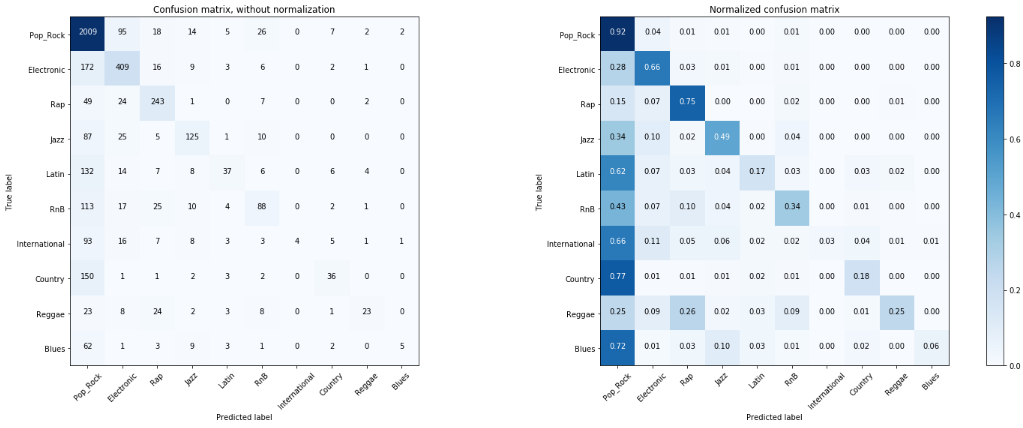

Confusion matrix, without normalization
[[2009   95   18   14    5   26    0    7    2    2]
 [ 172  409   16    9    3    6    0    2    1    0]
 [  49   24  243    1    0    7    0    0    2    0]
 [  87   25    5  125    1   10    0    0    0    0]
 [ 132   14    7    8   37    6    0    6    4    0]
 [ 113   17   25   10    4   88    0    2    1    0]
 [  93   16    7    8    3    3    4    5    1    1]
 [ 150    1    1    2    3    2    0   36    0    0]
 [  23    8   24    2    3    8    0    1   23    0]
 [  62    1    3    9    3    1    0    2    0    5]]
Normalized confusion matrix
[[  9.22e-01   4.36e-02   8.26e-03   6.43e-03   2.30e-03   1.19e-02
    0.00e+00   3.21e-03   9.18e-04   9.18e-04]
 [  2.78e-01   6.62e-01   2.59e-02   1.46e-02   4.85e-03   9.71e-03
    0.00e+00   3.24e-03   1.62e-03   0.00e+00]
 [  1.50e-01   7.36e-02   7.45e-01   3.07e-03   0.00e+00   2.15e-02
    0.00e+00   0.00e+00   6.13e-03   0.00e+00]
 [  3.44e-01   9.88e-02   1.98e-02   4.94e-01   3.95e-03

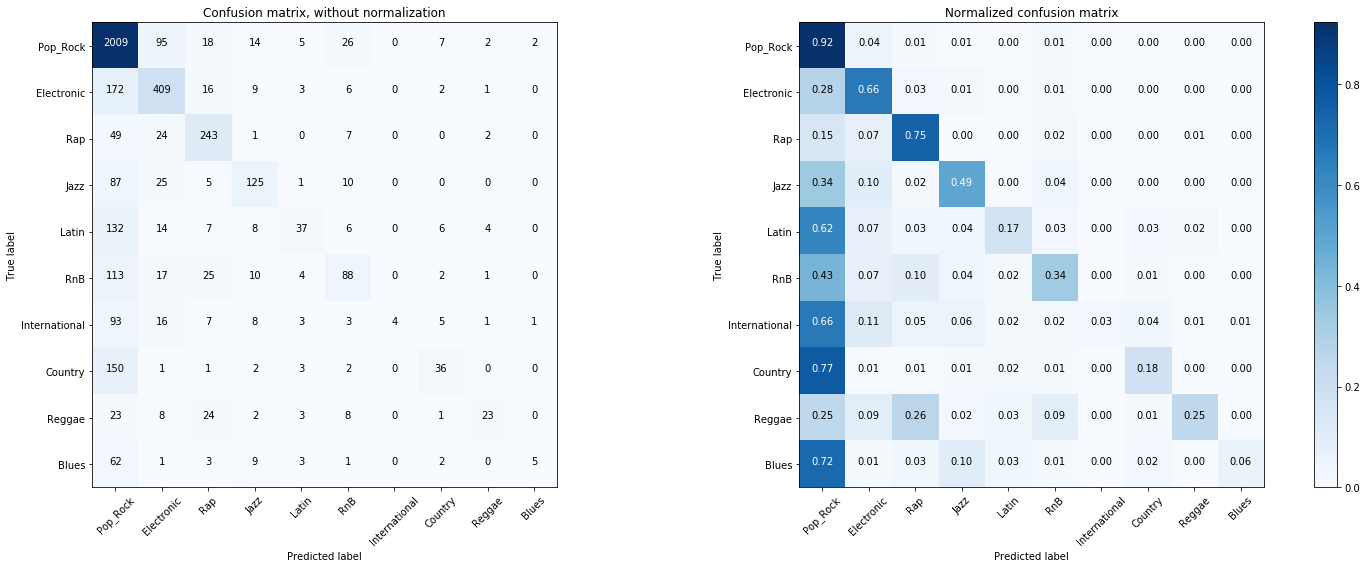

In [17]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
class_names = ['Pop_Rock', 'Electronic','Rap', 'Jazz', 'Latin', 'RnB', 'International', 'Country', 'Reggae', 'Blues']
cnf_matrix = confusion_matrix(train_labels, y_hat)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(24, 8))
plt.subplot(121) 
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.subplot(122) 
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## 5. Discussion/Conclusions

Judging from the confusion matrix and keeping in mind pop/rock, electronic and rap genres together amounted to 71,5 % of the training data, it is tempting to arrive at the conclusion that scarcity of the training data on the rest of the genres amounted to the unsuccesful prediction of songs belonging in those genres. On the other hand, for rap there was only half the training data compared to electronic music, and rap songs were still recognized with a better probability when compared. This actually reinforced correctness of the observation from the data analysis part about rap being a good candidate for training.
In the confusion matrix there are clear relationships between different genres. As reggae and rap can be a bit similar sometimes, you can see that many of the reggae songs were assigned to rap. Same goes for country and pop/rock. Country songs could sometimes be misinterpreted as rock or pop and it seems our classifier did exactly that.
As most of the inaccurate predictions were pop/rock, it would be interesting to see how the classifier performs if the pop/rock was completely removed. 

In a similar task done in Stanford University [4] a logistic regression classifier achieved 67,45% accuracy on training data and 64,75% accuracy on test data. Of course these results are not straightaway comparable because of different data. There was a training data consisting of 19922 songs with 518 features categorized in 9 different types and 16 different genres to identify. The test data consists of 2573 songs.
Even though the results are not straightaway comparable, they do offer some reference. This indicates that it might be very challenging to achieve high accuracy with logistic regression and some other methods might perform better.

If time would have permitted it would have been interesting to experiment PCA more and try out how not supervised learning methods, like clustering, would have faired in this case. This is something we would suggest for future work.


## 6. References

1. Alexander Jung. 2018. Machine Learning: Basic Principles
2. Andrew B. Collier. 2015. Making Sense of Logarithmic Loss.
https://datawookie.netlify.com/blog/2015/12/making-sense-of-logarithmic-loss/
3. Machine Learning: Basic Principles. Course material and exercises.
4. Music Genre Classification via Machine Learning. Li Guo, Zhiwei Gu, Tianchi Liu. https://pdfs.semanticscholar.org/f179/e8abd5c4752c36a3505fb5f3abfb483687ca.pdf